# Prepare Hugging Face Dataset card  

In [31]:
import jsonlines
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import sys

random.seed(42)

sns.set_style("whitegrid")

In [9]:
def load_jsonl(file_name: str):
    """Loads jsonl file.

    Args:
        file_name (str):
            File name to load.

    Returns:
        list of dict:
            Data from file.
    """
    data = []
    with jsonlines.open(file_name, mode="r") as reader:
        for obj in reader:
            data.append(obj)
    return data

In [10]:
DATA_PATH = "/mnt/data_6tb/oliver/doms_databasen/data/final/dataset.jsonl"

In [11]:
data = load_jsonl(DATA_PATH)

## Dataset Statistics

Number of samples

In [30]:
len(data)

3917

Size of dataset

In [12]:
size = os.path.getsize(DATA_PATH) / 1e6

print(f"Total size: {size:.2f} MB")

Total size: 199.07 MB


### PDF text length distribution

In [18]:
text_lengths = [pdf["text_len"] for pdf in data]
text_lengths_log10 = [math.log10(text_len) for text_len in text_lengths]

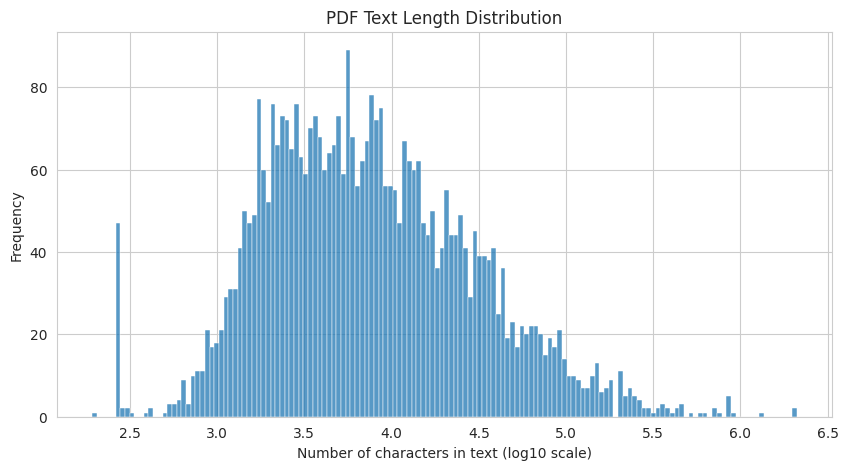

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(text_lengths_log10, bins=150)
plt.title("PDF Text Length Distribution")
plt.ylabel("Frequency")
plt.xlabel("Number of characters in text (log10 scale)")
plt.savefig("../figures/text_length_distribution.png")

In [26]:
min(text_lengths), max(text_lengths)

(192, 2101736)